# House Price Predictions Analysis

## Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('house_prediction_data.csv')

## Exploring Data

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df['ZN'].replace(0,np.nan,inplace=True)

In [7]:
df.isnull().sum()

CRIM         0
ZN         372
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
dtype: int64

## Visulaizing Data

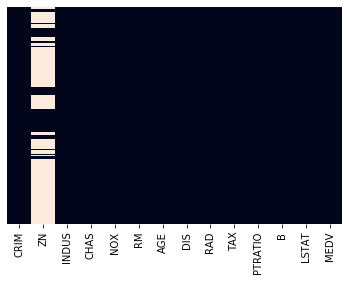

In [8]:
sns.heatmap(df.isnull(),cbar=False,
    yticklabels=False,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001809C70BCC8>,
      dtype=object)

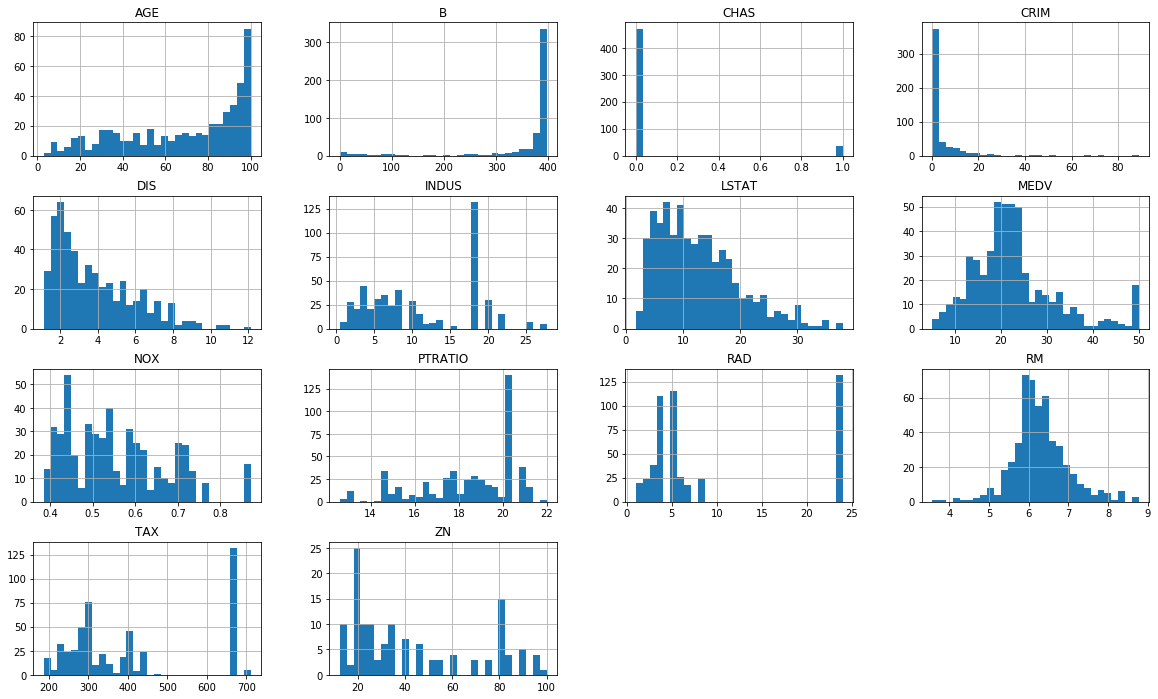

In [9]:
df.hist(bins=30,figsize=(20,12))

## Handling Missing values

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
impute = SimpleImputer(missing_values=np.nan,strategy='mean')

In [12]:
impute.fit(df[['ZN']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [13]:
df['ZN'] = impute.transform(df[['ZN']])

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.000000,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,42.910448,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,42.910448,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,42.910448,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,42.910448,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Scaling Data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(df[['TAX','B']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
df[['TAX','B']] = scaler.transform(df[['TAX','B']])

In [19]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.000000,2.31,0,0.538,6.575,65.2,4.0900,1,-0.666608,15.3,0.441052,4.98,24.0
1,0.02731,42.910448,7.07,0,0.469,6.421,78.9,4.9671,2,-0.987329,17.8,0.441052,9.14,21.6
2,0.02729,42.910448,7.07,0,0.469,7.185,61.1,4.9671,2,-0.987329,17.8,0.396427,4.03,34.7
3,0.03237,42.910448,2.18,0,0.458,6.998,45.8,6.0622,3,-1.106115,18.7,0.416163,2.94,33.4
4,0.06905,42.910448,2.18,0,0.458,7.147,54.2,6.0622,3,-1.106115,18.7,0.441052,5.33,36.2


## Splitting Data into Training and Testing Set

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop('MEDV',axis=1)
y = df['MEDV']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

## Training Data

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [24]:
lm = LinearRegression()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor(n_estimators=21)

In [25]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [27]:
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=21, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Testing Data 

In [28]:
lm_predict = lm.predict(X_test)

In [29]:
tree_predict = tree.predict(X_test)

In [30]:
forest_predict = forest.predict(X_test)

## Accuracy of Model

In [31]:
from sklearn.metrics import mean_squared_error,r2_score

In [32]:
print("Linear Model Accuracy")
print(mean_squared_error(y_test,lm_predict))
print(np.sqrt(mean_squared_error(y_test,lm_predict)))
print(r2_score(y_test,lm_predict))

Linear Model Accuracy
33.55439624408824
5.792615665145431
0.7009177435977267


In [33]:
print("Decision Tree Model Accuracy")
print(mean_squared_error(y_test,tree_predict))
print(np.sqrt(mean_squared_error(y_test,tree_predict)))
print(r2_score(y_test,tree_predict))

Decision Tree Model Accuracy
38.797156862745105
6.2287363776889055
0.6541871553255229


In [34]:
print("Random Forest Model Accuracy")
print(mean_squared_error(y_test,forest_predict))
print(np.sqrt(mean_squared_error(y_test,forest_predict)))
print(r2_score(y_test,forest_predict))

Random Forest Model Accuracy
15.078970699390869
3.883165036331944
0.8655957762377515


In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
lm_score = cross_val_score(lm,X,y,scoring='neg_mean_squared_error',cv=10)

In [37]:
lm_score

array([  -8.43124067,  -13.6264093 ,  -16.27899752,  -35.09275458,
        -32.20252585,  -22.95975857,  -10.7737304 , -170.70219329,
        -33.44304349,  -11.38124519])

In [38]:
tree_score = cross_val_score(tree,X,y,scoring='neg_mean_squared_error',cv=10)

In [39]:
-tree_score

array([14.16529412, 11.59509804, 16.04156863, 57.61686275, 17.06980392,
       44.47098039, 19.7224    , 89.686     , 62.8896    , 16.98      ])

In [40]:
forest_score = cross_val_score(forest,X,y,scoring='neg_mean_squared_error',cv=10)

In [41]:
-forest_score

array([10.55858877,  5.81725134,  4.43428082, 27.53481437, 11.33788137,
       25.31192833,  8.30088481, 93.74947302, 19.87524717, 14.75765442])

## Conclusion

#### Using the house prdiction dataset. First I deal with with missing values. Then scale down the data for our machine learning model. Then in the end we find that Random Forest Model is the best to give accurate values